# **Core Objectives:**

●	Understand how customer attributes and booking behaviors impact revenue.

●	Identify trends in lead time, stay duration, and booking channels.

●	Detects inconsistencies or anomalies in room allocation and guest handling.

●	Explore relationships between booking patterns and customer satisfaction indicators.

●	Evaluate whether specific operational or customer variables significantly affect outcomes such as ADR or room upgrades.


In [ ]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import legend

In [ ]:
df = pd.read_csv('hotel_bookings.csv')

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# **1.  Data Cleaning and Preprocessing**
Handle missing values in columns, Convert categorical variables into usable formats for analysis. Parse and standardize date columns, Create derived fields, Remove duplicate records if any, handle outliers if any.


In [ ]:
df.isna()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
(df.isnull().sum()/(len(df)))*100

,0
hotel,0.000000
is_canceled,0.000000
lead_time,0.000000
arrival_date_year,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000


In [ ]:
df = df.drop(columns='company')

In [ ]:
df['children'] = df['children'].fillna(df['children'].median())

In [ ]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [ ]:
df['agent'] = df['agent'].fillna(df['country'].mode()[0])

In [ ]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df.duplicated().sum()

np.int64(32001)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d',errors='coerce' )

In [ ]:
df = df.drop(columns=['arrival_date_year','arrival_date_month','arrival_date_day_of_month'])

In [ ]:
df = df.drop(columns=['arrival_date_week_number'])

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

In [ ]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [ ]:
df = df.drop(columns=['stays_in_weekend_nights','stays_in_week_nights'])

In [ ]:
df['total_guests'] = (df['adults'] + df['children'].fillna(0) + df['babies']).astype(int)

In [ ]:
df = df.drop(columns=['adults','children','babies'])

In [ ]:
num_df = df.select_dtypes(include=['number'])
num_df.head()

,is_canceled,lead_time,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_nights,total_guests
0,0,342,0,0,0,3,0,0.0,0,0,0,2
1,0,737,0,0,0,4,0,0.0,0,0,0,2
2,0,7,0,0,0,0,0,75.0,0,0,1,1
3,0,13,0,0,0,0,0,75.0,0,0,1,1
4,0,14,0,0,0,0,0,98.0,0,1,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87370 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87370 non-null  object        
 1   is_canceled                     87370 non-null  int64         
 2   lead_time                       87370 non-null  int64         
 3   meal                            87370 non-null  object        
 4   country                         87370 non-null  object        
 5   market_segment                  87370 non-null  object        
 6   distribution_channel            87370 non-null  object        
 7   is_repeated_guest               87370 non-null  int64         
 8   previous_cancellations          87370 non-null  int64         
 9   previous_bookings_not_canceled  87370 non-null  int64         
 10  reserved_room_type              87370 non-null  object        
 11  assign

In [ ]:
obj_df = df.select_dtypes(include=['object'])
obj_df.head()

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,reservation_status
0,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,PRT,Transient,Check-Out
1,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,PRT,Transient,Check-Out
2,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,PRT,Transient,Check-Out
3,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,304.0,Transient,Check-Out
4,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,240.0,Transient,Check-Out


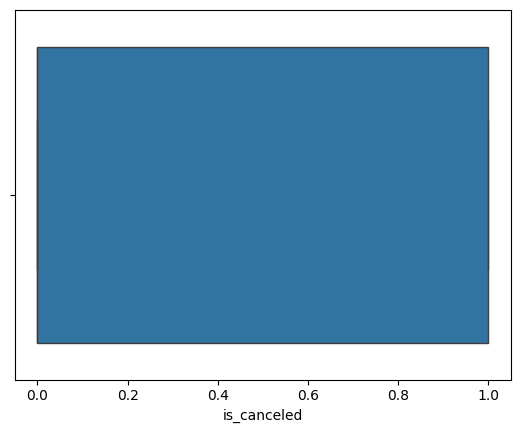

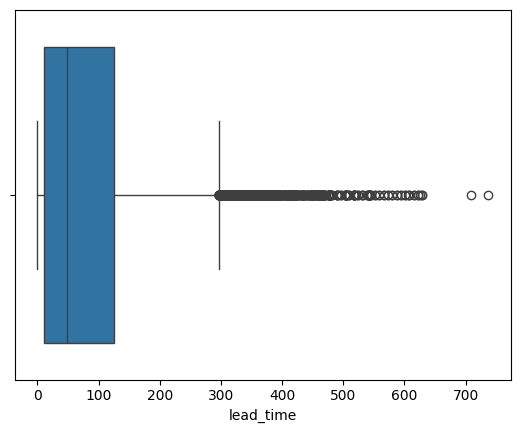

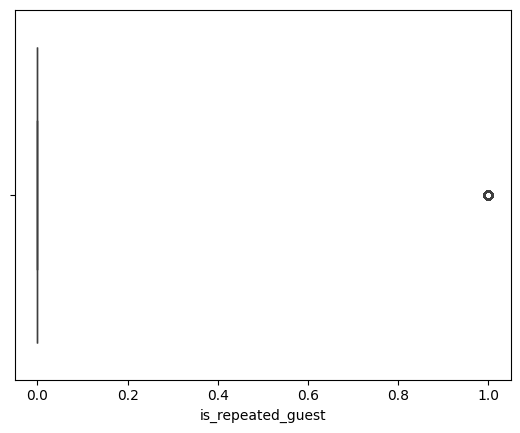

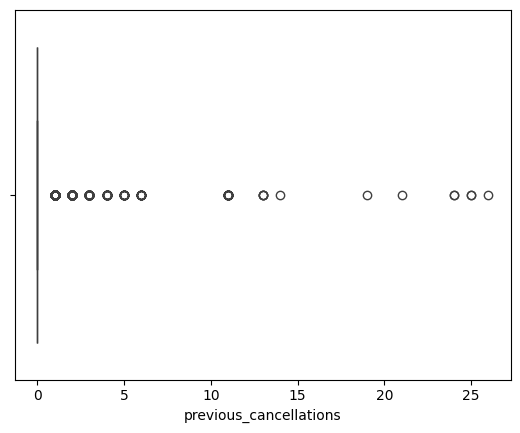

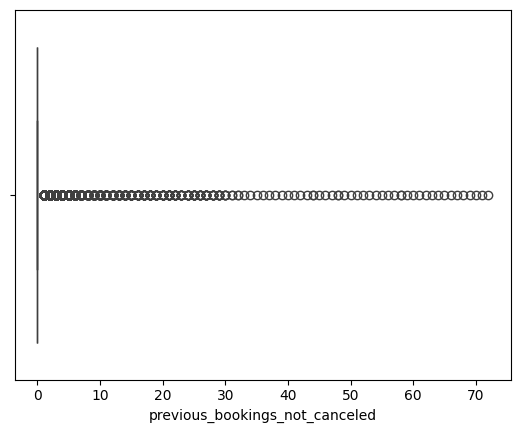

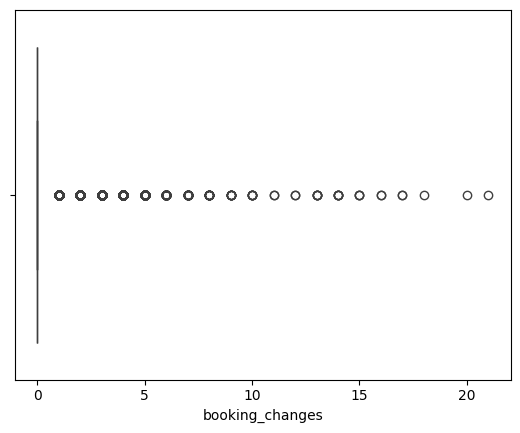

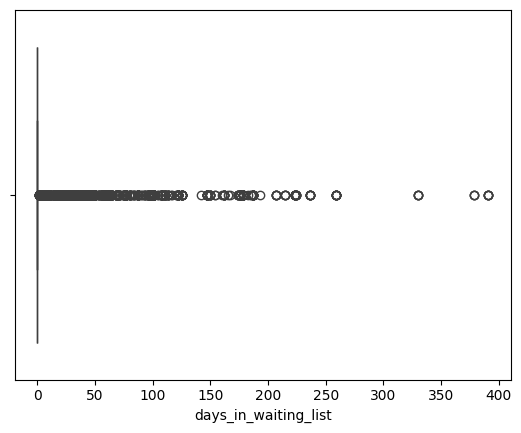

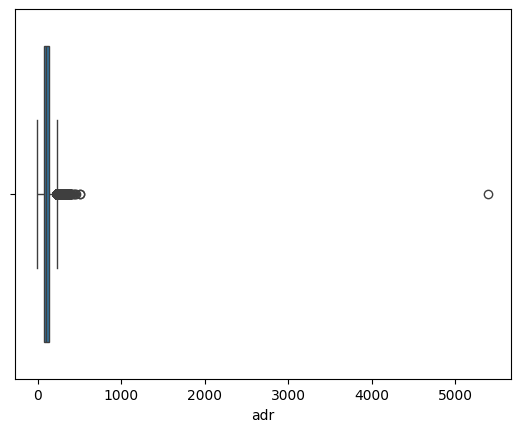

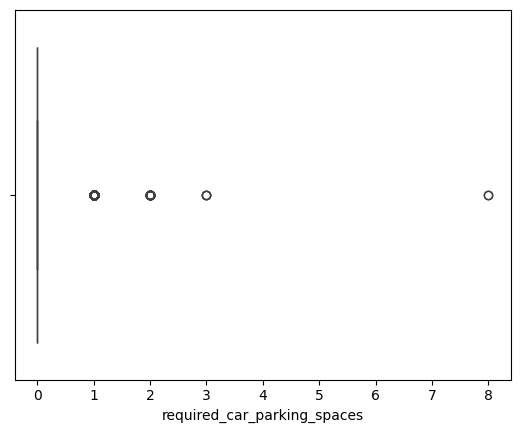

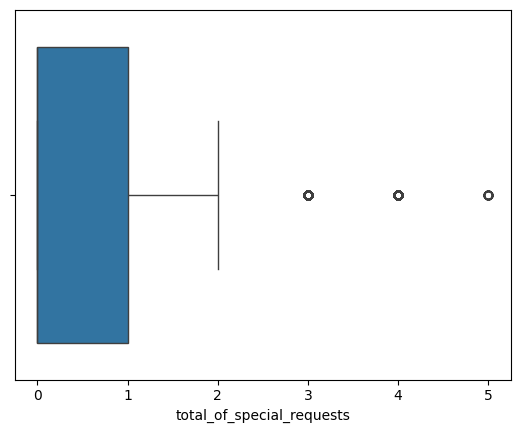

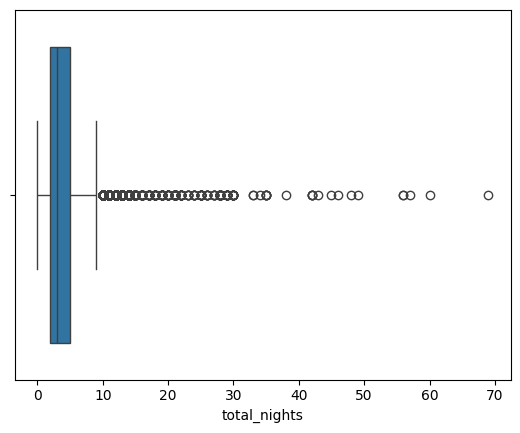

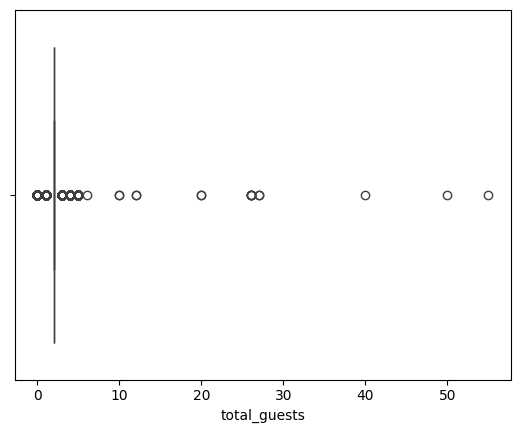

In [ ]:
for ctr in num_df.select_dtypes(include='number').columns:
  sns.boxplot(data=num_df,x=ctr)
  plt.show()

In [ ]:
df.loc[df['adr'] < 0, 'adr'] = 0

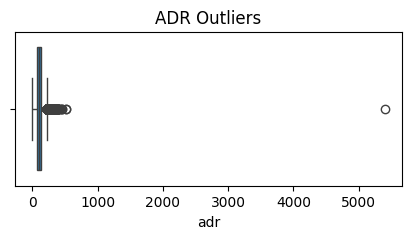

In [ ]:
plt.figure(figsize=(5,2))
sns.boxplot(x=df['adr'])
plt.title('ADR Outliers')
plt.show()

In [ ]:
df.loc[df['adr'] > 500, 'adr'] = 0

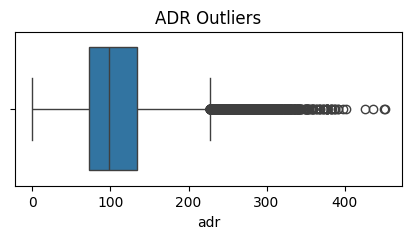

In [ ]:
plt.figure(figsize=(5,2))
sns.boxplot(x=df['adr'])
plt.title('ADR Outliers')
plt.show()

In [ ]:
df.shape

(87370, 25)

# **2. 📊 Exploratory Data Analysis**
Univariate and bivariate and multivariate analysis using relevant plots, Time-series analysis of booking trends. Guest demographics and distribution by country. Market segment share and ADR (Average Daily Rate) comparison. Booking lead time distribution across customer types


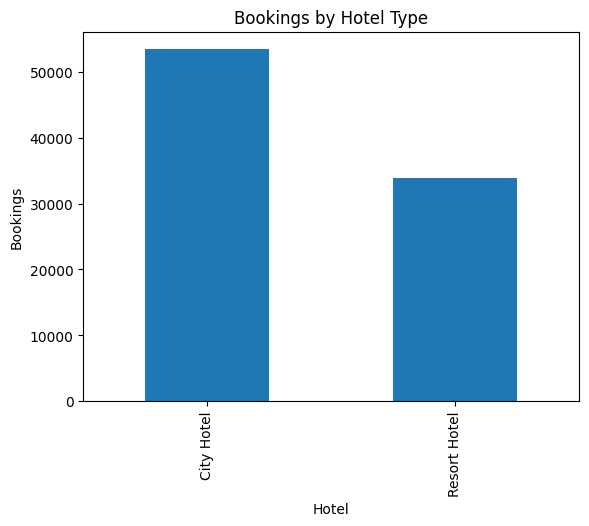

In [ ]:
# Univariate Analysis
# Plot hotel type
df['hotel'].value_counts().plot(kind='bar')
plt.xlabel('Hotel')
plt.ylabel('Bookings')
plt.title('Bookings by Hotel Type')
plt.show()

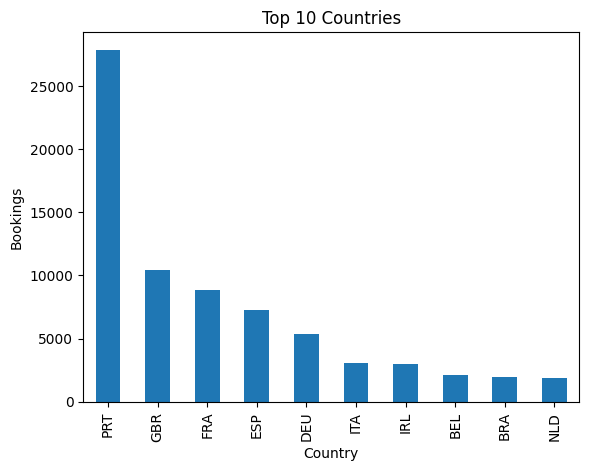

In [ ]:
# Top 10 countries
plt.figure()
df['country'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Bookings')
plt.title('Top 10 Countries')
plt.show()

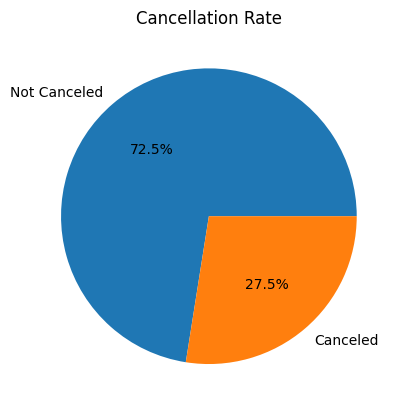

In [ ]:
# Cancellations pie
plt.figure()
df['is_canceled'].replace({0:'Not Canceled',1:'Canceled'}).value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Cancellation Rate')
plt.ylabel('')
plt.show()

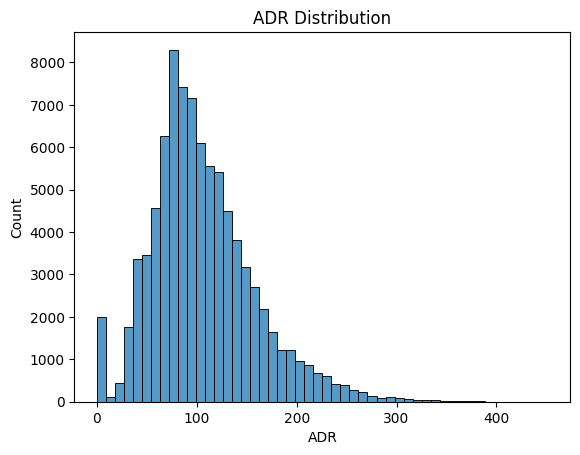

In [ ]:
# ADR distribution
plt.figure()
sns.histplot(df[df['adr'] < 500]['adr'], bins=50)
plt.xlabel('ADR')
plt.title('ADR Distribution')
plt.show()

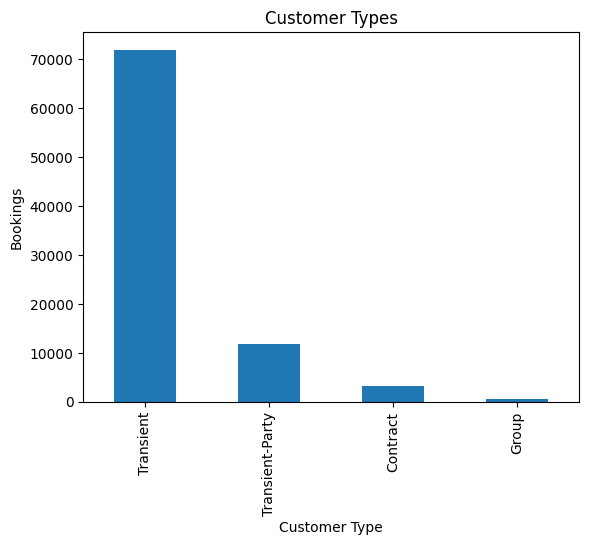

In [ ]:
# Customer types
plt.figure()
df['customer_type'].value_counts().plot(kind='bar')
plt.xlabel('Customer Type')
plt.ylabel('Bookings')
plt.title('Customer Types')
plt.show()

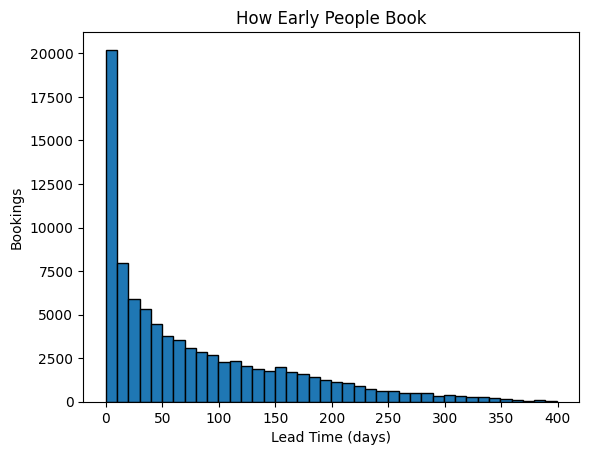

In [ ]:
# Lead time
df[df['lead_time'] < 400]['lead_time'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlabel('Lead Time (days)')
plt.ylabel('Bookings')
plt.title('How Early People Book')
plt.show()

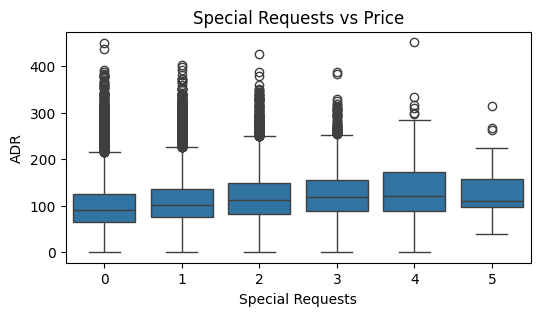

In [ ]:
# Special Requests vs ADR
plt.figure(figsize=(6,3))
sns.boxplot(x='total_of_special_requests', y='adr', data=df[df['adr'] < 500])
plt.xlabel('Special Requests')
plt.ylabel('ADR')
plt.title('Special Requests vs Price')
plt.show()

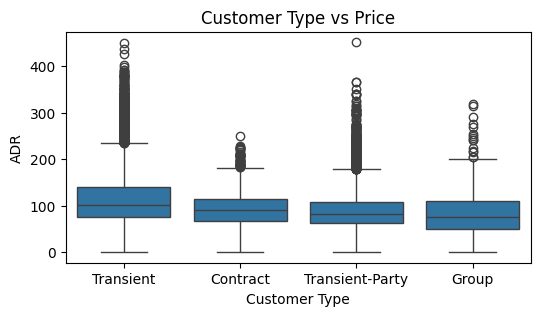

In [ ]:
# Customer type vs ADR
plt.figure(figsize=(6,3))
sns.boxplot(x='customer_type', y='adr', data=df[df['adr'] < 500])
plt.xlabel('Customer Type')
plt.ylabel('ADR')
plt.title('Customer Type vs Price')
plt.show()

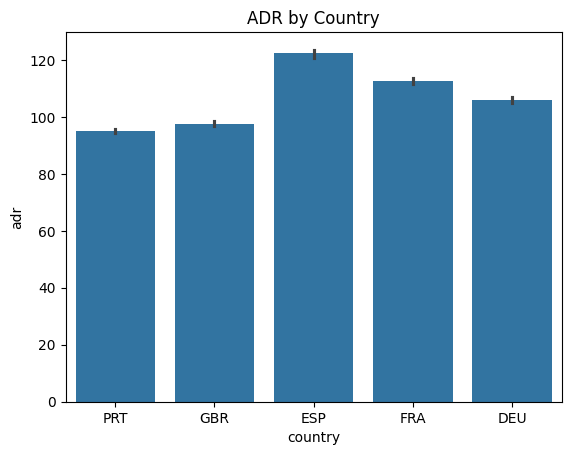

In [ ]:
# ADR by top 5 countries
plt.figure()
top_countries = df['country'].value_counts().head(5).index.tolist()
sns.barplot(x=df[df['country'].isin(top_countries)]['country'], y=df[df['country'].isin(top_countries)]['adr'])
plt.title('ADR by Country')
plt.show()

<ipython-input-74-dd7123747f87>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('lead_time_group')['booking_changes'].mean().plot(kind='bar')


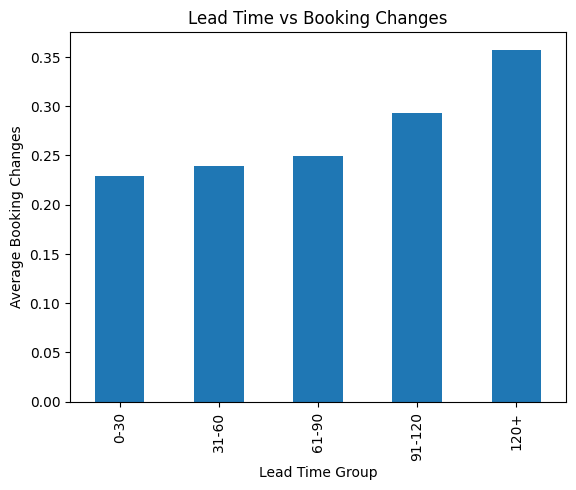

In [ ]:
# Lead time group vs booking changes
lead_time_bins = [0, 30, 60, 90, 120, 400]
labels = ['0-30', '31-60', '61-90', '91-120', '120+']
df['lead_time_group'] = pd.cut(df['lead_time'], bins=lead_time_bins, labels=labels, include_lowest=True)
plt.figure()
df.groupby('lead_time_group')['booking_changes'].mean().plot(kind='bar')
plt.xlabel('Lead Time Group')
plt.ylabel('Average Booking Changes')
plt.title('Lead Time vs Booking Changes')
plt.show()

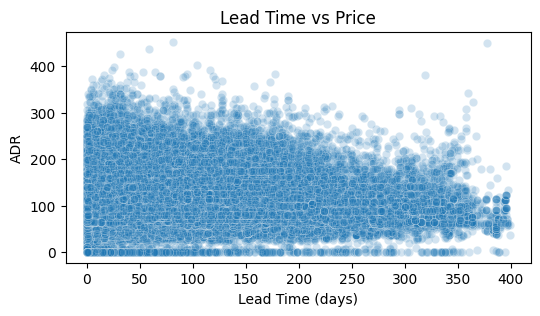

In [ ]:
# Bivariate/Multivariate Analysis
# Lead Time vs ADR
plt.figure(figsize=(6,3))
sns.scatterplot(x=df[df['lead_time']<400]['lead_time'], y=df[df['lead_time']<400]['adr'], alpha=0.2)
plt.xlabel('Lead Time (days)')
plt.ylabel('ADR')
plt.title('Lead Time vs Price')
plt.show()

# **3. Correlation Analysis**
Compute Pearson/Spearman correlation matrix for numeric feature. Visualize correlations using heatmaps to detect multicollinearity. Explore how strongly adr is influenced by lead time, special requests, and booking changes


In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
#Pearson Correlation
pearson_corr = numeric_df.corr(method='pearson')
#sepearman correlation
spearman_corr = numeric_df.corr(method='spearman')

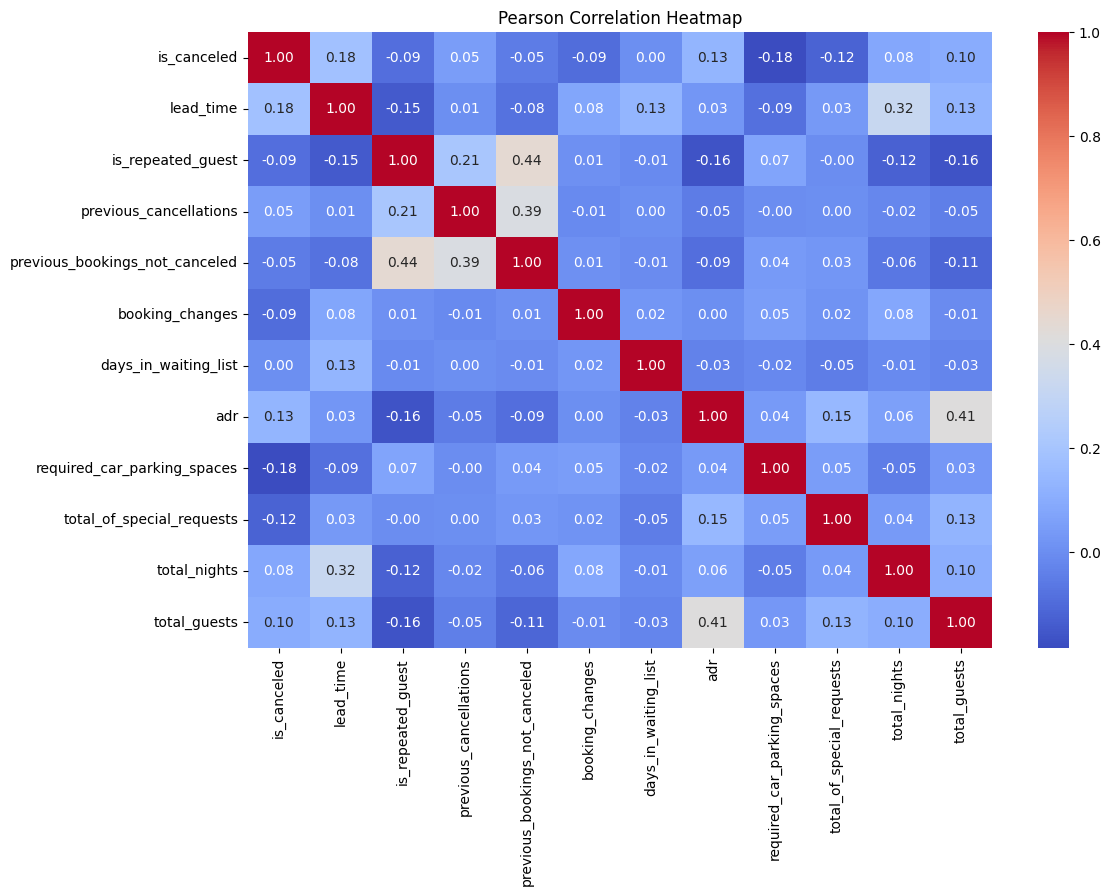

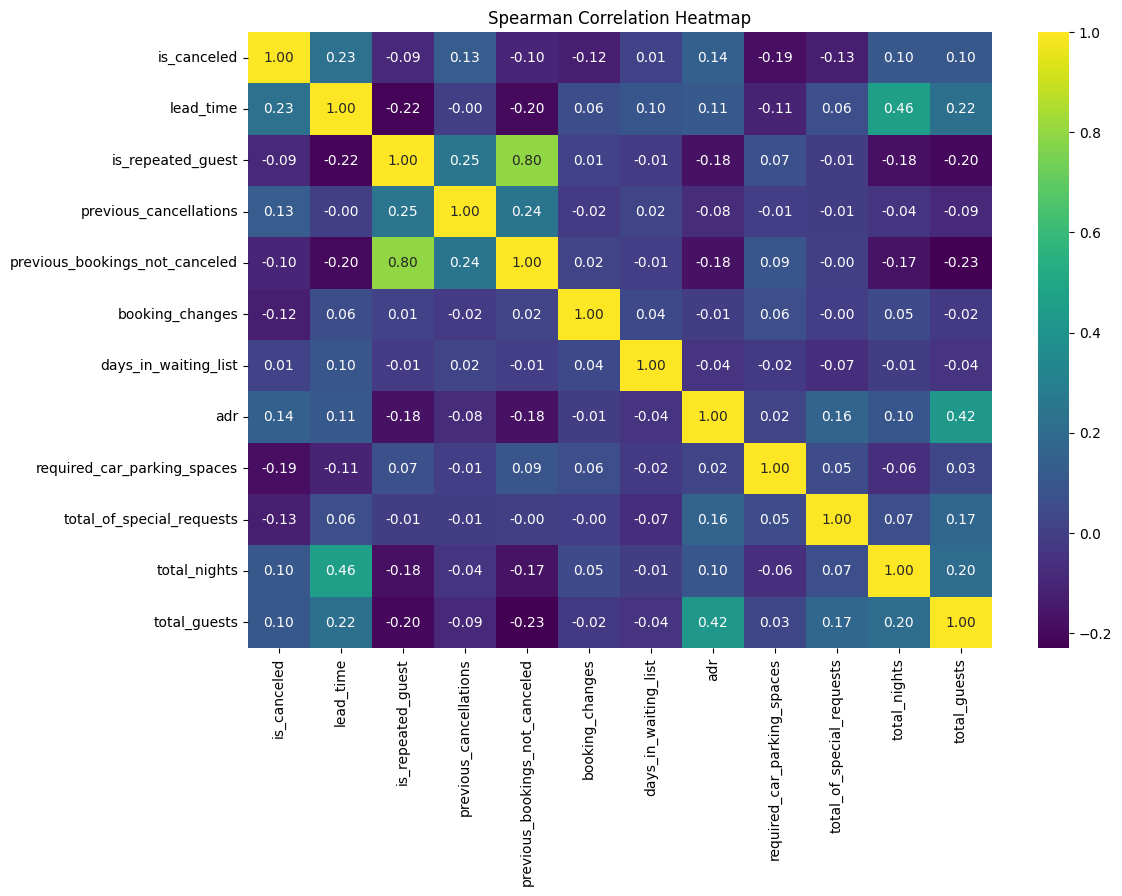

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='viridis')
plt.title('Spearman Correlation Heatmap')
plt.show()

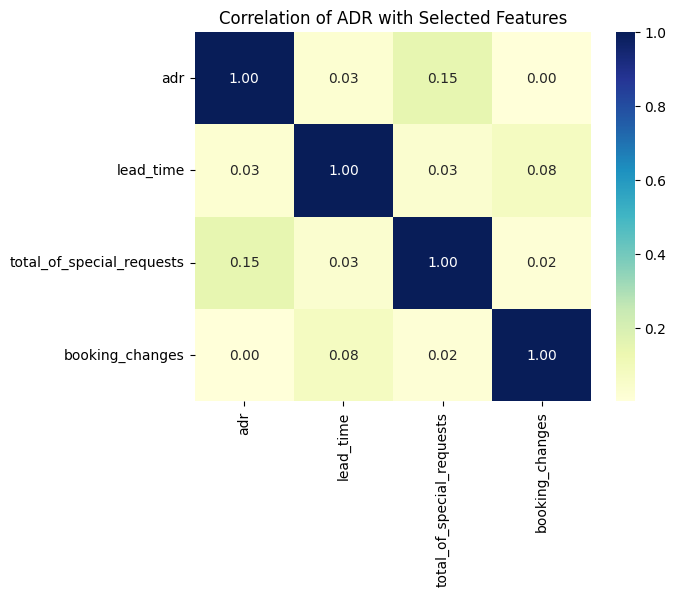

In [ ]:
features = ['adr', 'lead_time', 'total_of_special_requests', 'booking_changes']
adr_corr = numeric_df[features].corr(method='pearson')
sns.heatmap(adr_corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation of ADR with Selected Features')
plt.show()

In [ ]:
print("Correlation of ADR with lead_time:", adr_corr.loc['adr', 'lead_time'])
print("Correlation of ADR with special requests:", adr_corr.loc['adr', 'total_of_special_requests'])
print("Correlation of ADR with booking_changes:", adr_corr.loc['adr', 'booking_changes'])

Correlation of ADR with lead_time: 0.025606489481637077
Correlation of ADR with special requests: 0.14683223547878377
Correlation of ADR with booking_changes: 0.0015436884420896618


# **4.  Hypothesis Testing**

Use statistical tests to validate business assumptions:

H0: There is no difference in ADR between bookings made through Online TA and Direct channels

H0: Room upgrades are independent of lead time

H0: Average stay duration does not differ between customer types


In [ ]:
from scipy.stats import ttest_ind

# Filter ADR values for each group
adr_online = df[df['distribution_channel'] == 'TA/TO']['adr']
adr_direct = df[df['distribution_channel'] == 'Direct']['adr']

# Perform t-test
t_stat, p_val = ttest_ind(adr_online, adr_direct, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject H0 → ADR differs between Online TA and Direct")
else:
    print("Fail to reject H0 → No significant difference in ADR")

T-statistic: -1.121889536438922
P-value: 0.2619261344660575
Fail to reject H0 → No significant difference in ADR


In [ ]:
from scipy.stats import mannwhitneyu

# Create binary feature for upgrade
df['room_upgraded'] = df['assigned_room_type'] != df['reserved_room_type']

# Separate lead times
lead_time_upgraded = df[df['room_upgraded']]['lead_time']
lead_time_not_upgraded = df[~df['room_upgraded']]['lead_time']

# Mann-Whitney U test
u_stat, p_val = mannwhitneyu(lead_time_upgraded, lead_time_not_upgraded, alternative='two-sided')

print("U-statistic:", u_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject H0 → Lead time influences room upgrade")
else:
    print("Fail to reject H0 → Room upgrades are independent of lead time")

U-statistic: 368535962.0
P-value: 0.0
Reject H0 → Lead time influences room upgrade


In [ ]:
from scipy.stats import f_oneway

# Create new feature: stay duration
# df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Group by customer_type
grouped = [group['total_nights'] for name, group in df.groupby('customer_type')]

# Perform ANOVA
f_stat, p_val = f_oneway(*grouped)

print("F-statistic:", f_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject H0 → Stay duration differs by customer type")
else:
    print("Fail to reject H0 → No significant difference in stay duration")

F-statistic: 880.6761823585692
P-value: 0.0
Reject H0 → Stay duration differs by customer type


# **5.  Key Business Questions**
●	What influences ADR the most?

●	Do guests who book earlier tend to request more changes?

●	Are there pricing or booking differences across countries?

●	Is there a pattern in room upgrades or reassignment?

●	Are reserved room types consistently matched with assigned room types?

●	What are the most common guest demographics (e.g., group size, nationality)?

●	Are there patterns in guest types (e.g., transient vs. corporate) that influence booking behavior?

●	How does booking lead time vary across customer types and countries?

●	Are longer lead times associated with fewer booking changes or cancellations?

●	What is the typical duration of stay, and how does it vary by customer type or segment?

●	How often are guests upgraded or reassigned to a different room type?

●	Are guests who make special requests more likely to experience booking changes or longer stays?

●	Do certain market segments or distribution channels show higher booking consistency or revenue?

●	What factors are most strongly associated with higher ADR?

●	Are there customer types or segments consistently contributing to higher revenue?

●	Do bookings with more lead time or from specific countries yield higher ADR?

●	Are guests with higher ADR more likely to request special services or make booking modifications?

●	Do guests from different countries behave differently in terms of booking timing or stay length?

●	Are guests who make booking changes more likely to request additional services or cancel?



<Axes: >

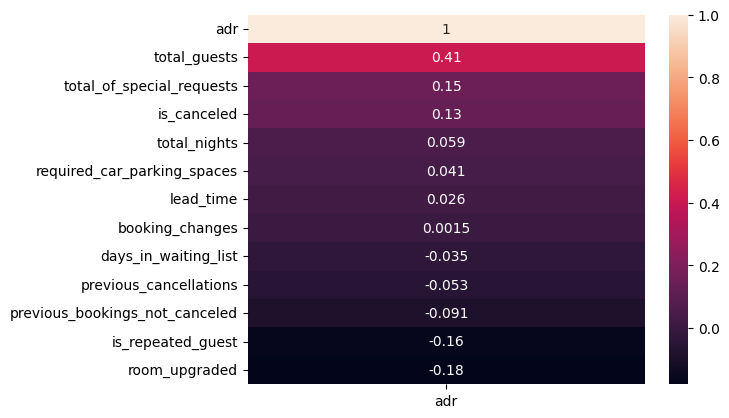

In [ ]:
1.
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix[['adr']].sort_values(by='adr', ascending=False), annot=True)

<Axes: xlabel='lead_time', ylabel='booking_changes'>

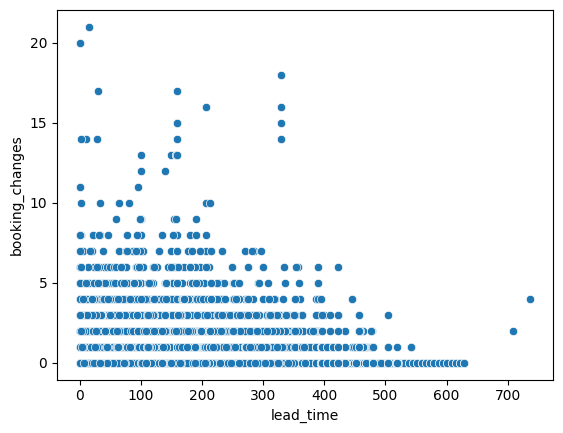

In [ ]:
# 2.
sns.scatterplot(data=df, x='lead_time', y='booking_changes')

<Axes: xlabel='is_canceled', ylabel='lead_time'>

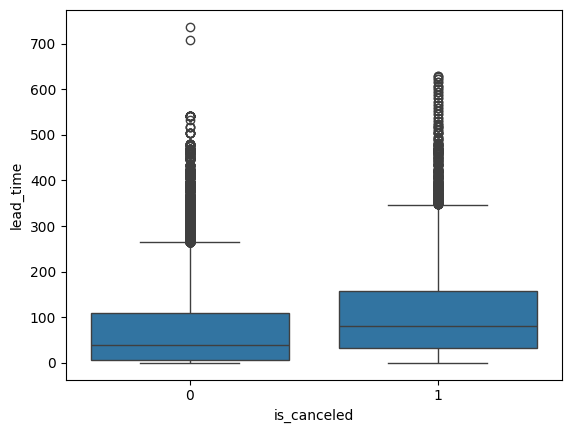

In [ ]:
sns.boxplot(x='is_canceled', y='lead_time', data=df)

In [ ]:
# 3.
df.groupby('country')['adr'].mean().sort_values(ascending=False).head(10)

,adr
country,
DJI,273.000000
AIA,265.000000
AND,202.652857
UMI,200.000000
LAO,181.665000
MYT,177.750000
NCL,175.500000
GIB,169.082667
FRO,165.666667


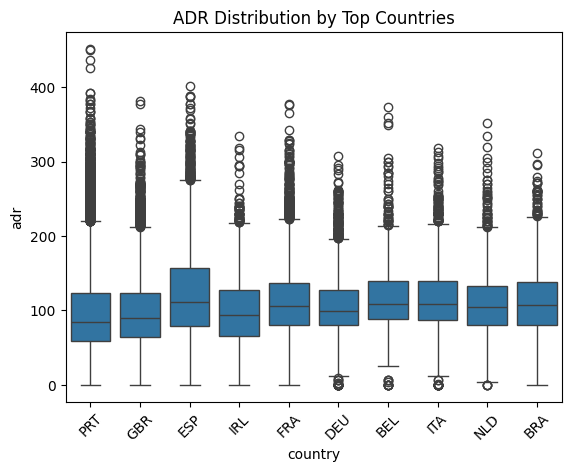

country
PRT    27882
GBR    10432
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
Name: count, dtype: int64


In [ ]:
# ADR by country (top 10 countries by bookings)
top_countries = df['country'].value_counts().head(10).index
sns.boxplot(x='country', y='adr', data=df[df['country'].isin(top_countries)])
plt.title('ADR Distribution by Top Countries')
plt.xticks(rotation=45)
plt.show()

# Booking counts by country
print(df['country'].value_counts().head(10))

In [ ]:
# 4.
df['is_upgraded'] = df['reserved_room_type'] != df['assigned_room_type']
df['is_upgraded'].head()

,is_upgraded
0,False
1,False
2,True
3,False
4,False


Upgrade or reassignment rate: 14.99%


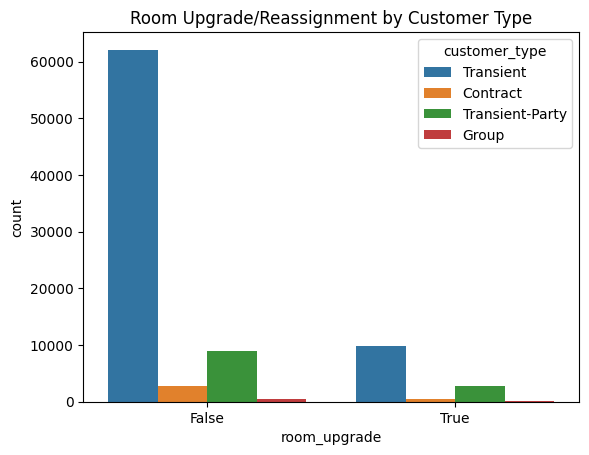

In [ ]:
# Create a column if upgrade happened (assigned room better than reserved)
df['room_upgrade'] = df['assigned_room_type'] != df['reserved_room_type']

upgrade_rate = df['room_upgrade'].mean()
print(f'Upgrade or reassignment rate: {upgrade_rate:.2%}')

# Upgrade by customer type
sns.countplot(x='room_upgrade', hue='customer_type', data=df)
plt.title('Room Upgrade/Reassignment by Customer Type')
plt.show()


In [ ]:
match_rate = (df['reserved_room_type'] == df['assigned_room_type']).mean()
match_rate

np.float64(0.8500858418221358)

In [ ]:
# 5.
# df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_guests'].value_counts().head()

,count
total_guests,
2,57048
1,16055
3,10078
4,3870
0,166


In [ ]:
match_rate = (df['reserved_room_type'] == df['assigned_room_type']).mean()
print(f'Reserved and assigned room match rate: {match_rate:.2%}')

Reserved and assigned room match rate: 85.01%


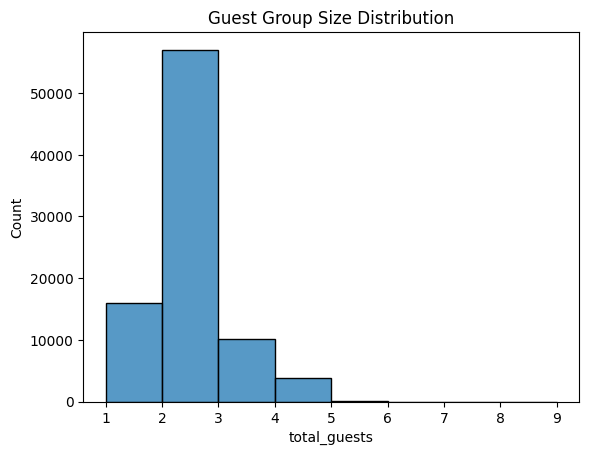

country
PRT    27882
GBR    10432
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
Name: count, dtype: int64


In [ ]:
# Group size
# df['group_size'] = df['adults'] + df['children'] + df['babies']
sns.histplot(df['total_guests'], bins=range(1,10))
plt.title('Guest Group Size Distribution')
plt.show()

# Nationality top 10
print(df['country'].value_counts().head(10))


<Axes: xlabel='customer_type', ylabel='adr'>

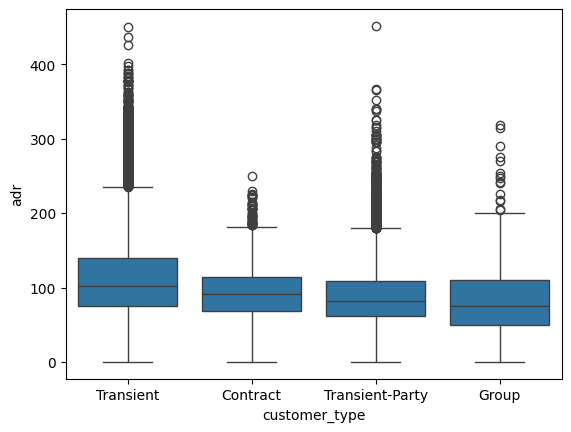

In [ ]:
# 6.
sns.boxplot(x='customer_type', y='adr', data=df)

In [ ]:
# df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_nights'].head()

,total_nights
0,0
1,0
2,1
3,1
4,2


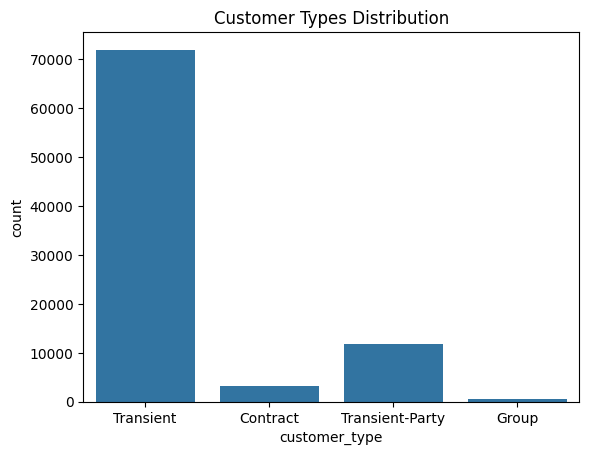

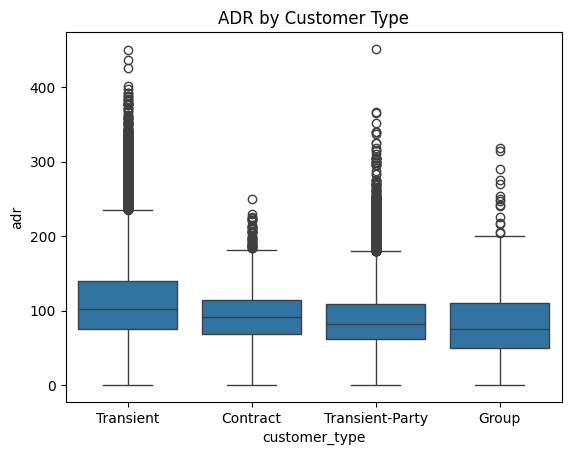

In [ ]:
sns.countplot(x='customer_type', data=df)
plt.title('Customer Types Distribution')
plt.show()

# ADR by customer type
sns.boxplot(x='customer_type', y='adr', data=df)
plt.title('ADR by Customer Type')
plt.show()


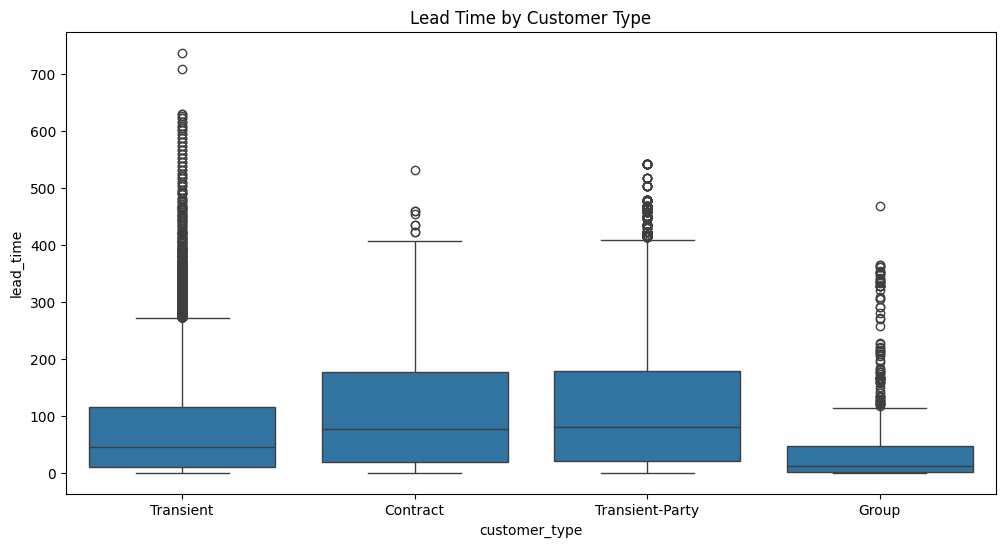

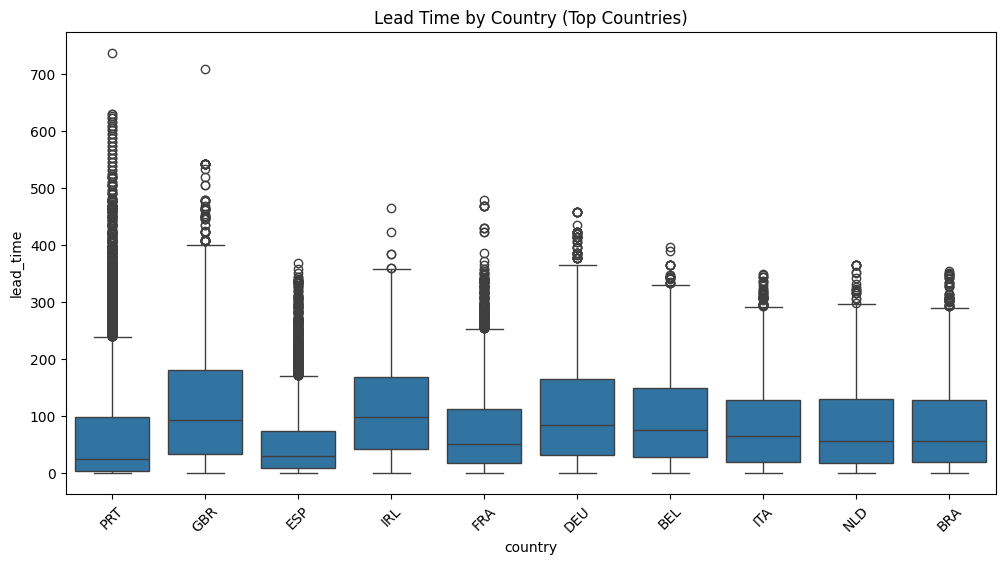

In [ ]:
# 8.
plt.figure(figsize=(12,6))
sns.boxplot(x='customer_type', y='lead_time', data=df)
plt.title('Lead Time by Customer Type')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='country', y='lead_time', data=df[df['country'].isin(top_countries)])
plt.title('Lead Time by Country (Top Countries)')
plt.xticks(rotation=45)
plt.show()


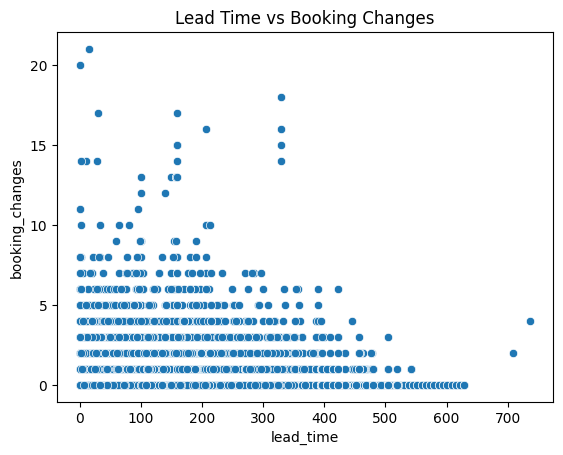

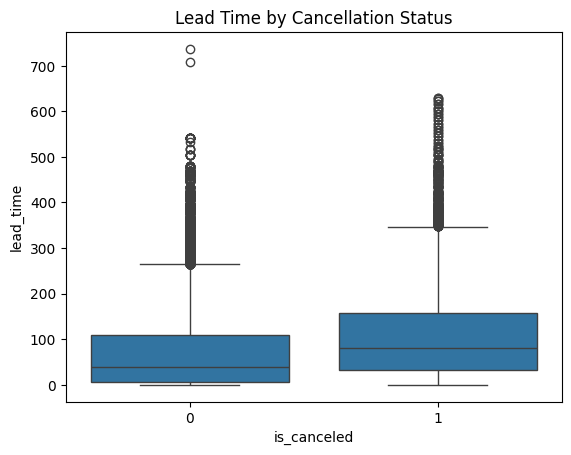

In [ ]:
# 9.
sns.scatterplot(x='lead_time', y='booking_changes', data=df)
plt.title('Lead Time vs Booking Changes')
plt.show()

sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time by Cancellation Status')
plt.show()

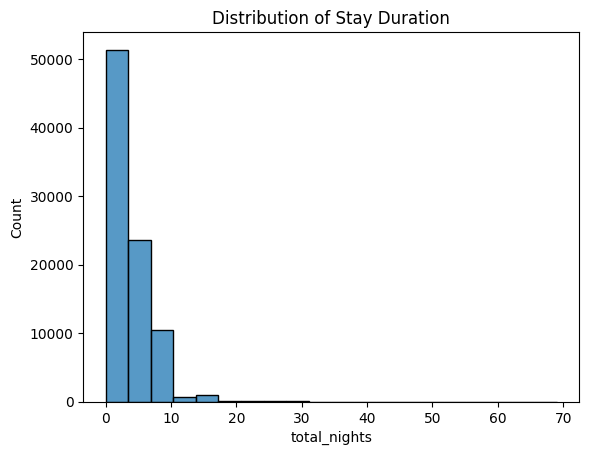

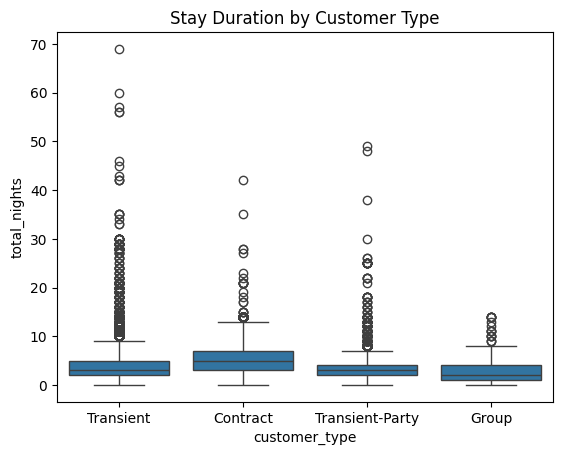

In [ ]:
# 10.
# df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
sns.histplot(df['total_nights'], bins=20)
plt.title('Distribution of Stay Duration')
plt.show()

sns.boxplot(x='customer_type', y='total_nights', data=df)
plt.title('Stay Duration by Customer Type')
plt.show()

In [ ]:
# 11.
# same as que 4

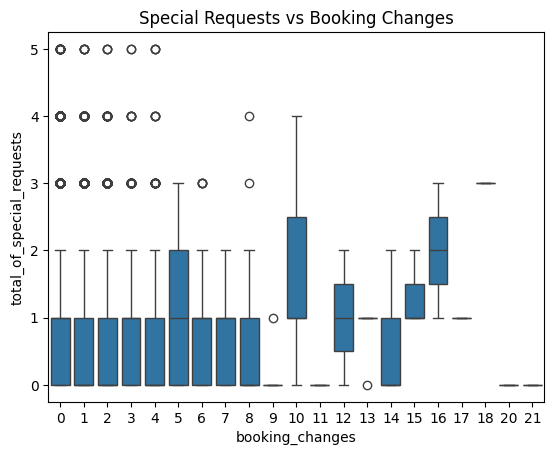

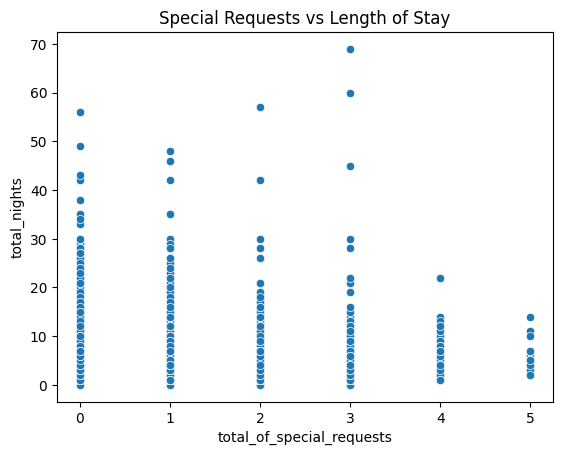

In [ ]:
# 12.
sns.boxplot(x='booking_changes', y='total_of_special_requests', data=df)
plt.title('Special Requests vs Booking Changes')
plt.show()

sns.scatterplot(x='total_of_special_requests', y='total_nights', data=df)
plt.title('Special Requests vs Length of Stay')
plt.show()

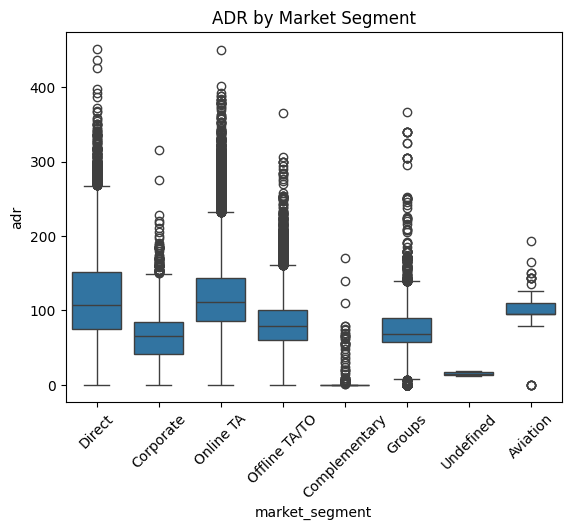

Cancellation Rate by Distribution Channel:
 distribution_channel
Corporate    0.127785
Direct       0.148305
GDS          0.198895
TA/TO        0.309707
Undefined    0.800000
Name: is_canceled, dtype: float64


In [ ]:
# 13.
sns.boxplot(x='market_segment', y='adr', data=df)
plt.title('ADR by Market Segment')
plt.xticks(rotation=45)
plt.show()

booking_consistency = df.groupby('distribution_channel')['is_canceled'].mean()
print("Cancellation Rate by Distribution Channel:\n", booking_consistency)

In [ ]:
# 14.
# same as que 1

customer_type
Contract           523.047729
Group              249.829890
Transient          406.283735
Transient-Party    293.004813
Name: revenue, dtype: float64


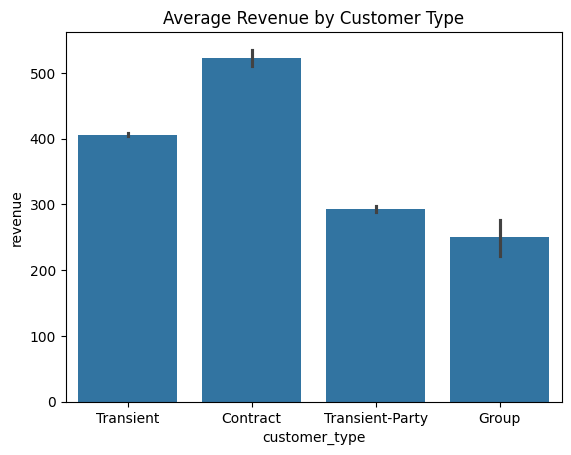

In [ ]:
# 15.
df['revenue'] = df['adr'] * df['total_nights']
revenue_by_customer_type = df.groupby('customer_type')['revenue'].mean()
print(revenue_by_customer_type)

sns.barplot(x='customer_type', y='revenue', data=df)
plt.title('Average Revenue by Customer Type')
plt.show()

In [ ]:
# 16.
# same as que 1 and 3

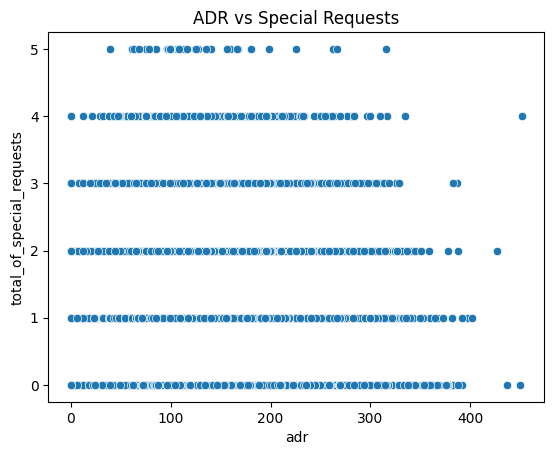

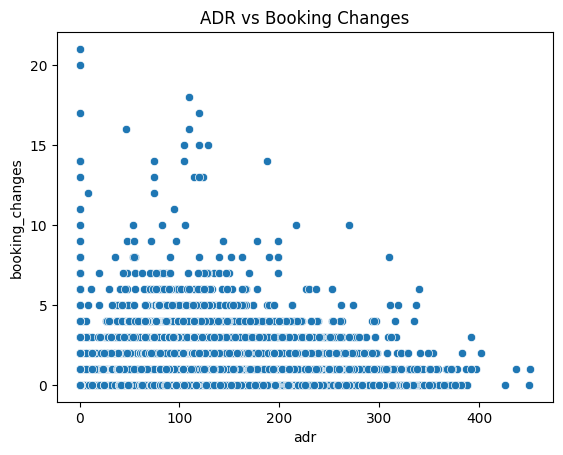

In [ ]:
# 17.
sns.scatterplot(x='adr', y='total_of_special_requests', data=df)
plt.title('ADR vs Special Requests')
plt.show()

sns.scatterplot(x='adr', y='booking_changes', data=df)
plt.title('ADR vs Booking Changes')
plt.show()

In [ ]:
# 18.
# same as que 3 and 7

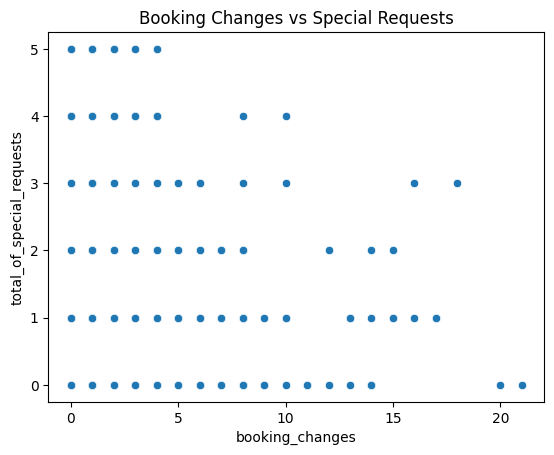

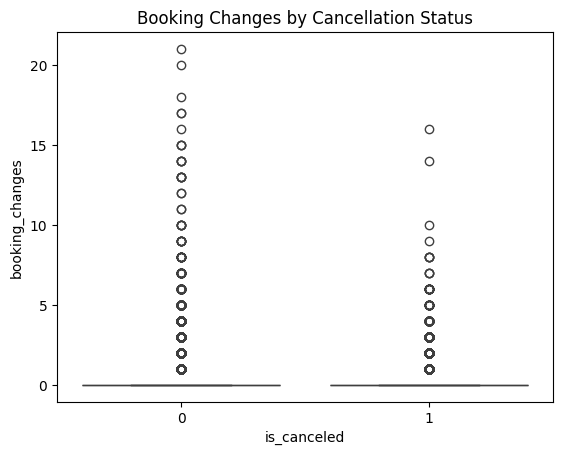

In [ ]:
# 19.
sns.scatterplot(x='booking_changes', y='total_of_special_requests', data=df)
plt.title('Booking Changes vs Special Requests')
plt.show()

sns.boxplot(x='is_canceled', y='booking_changes', data=df)
plt.title('Booking Changes by Cancellation Status')
plt.show()